In [1]:
#lets first read in the data from the cleaned csv file
import pandas as pd

df = pd.read_csv('insurance_claims_cleaned_fixed.csv')


In [2]:
#Okay, now we can start exploring the data, in particular, the demographic and financial columns.

#lets first look at the columns we have to work with
df.columns



Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital_gains', 'capital_loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'policy_csl_person',
       'policy_csl_accident', 'incident_year', 'incident_month',
       'incident_day', 'incident_dayofweek', 'calculated_total_claim'],
      dtype='object')

# Financial Columns Overview

The dataset includes several important financial columns related to insurance policies:

---

## Policy Annual Premium  
A **policy annual premium** is the total amount of money you pay an insurance company for coverage over a one-year period.  

- **Policy** → your insurance contract.  
- **Premium** → the cost you pay for that contract.  
- **Annual** → the full amount for a 12-month period.  

This value is typically paid either all at once or split into monthly installments.

---

## Policy Deductible  
A **policy deductible** is the amount you must pay out-of-pocket before your insurance coverage starts to pay for a claim.  

- Higher deductibles usually mean lower premiums.  
- Lower deductibles usually mean higher premiums.  

This column reflects the dollar value that the policyholder must cover before insurance kicks in.

---

## Capital Gains  
**Capital gains** represent the profit made from selling an asset (like stocks, property, or investments) at a higher price than it was purchased.  

- Example: If you bought stock for $1,000 and sold it for $1,500, the $500 is your capital gain.  
- In an insurance dataset, this may reflect declared or reported gains by the policyholder.  

---

## Capital Loss  
**Capital loss** is the opposite of a gain — it occurs when an asset is sold for less than its purchase price.  

- Example: If you bought stock for $1,000 and sold it for $800, the $200 loss is your capital loss.  
- Like gains, this can influence overall financial risk assessment for underwriting.  

---

## Umbrella Limit  
An **umbrella limit** is the maximum amount an umbrella insurance policy will pay out.  

- Umbrella policies provide extra liability protection beyond the limits of standard insurance (e.g., auto or home).  
- The umbrella limit defines the highest amount the insurer will cover for claims across multiple policies.  

This column is particularly important for understanding how much additional coverage a policyholder has.


In [3]:
#Lets first start taking a look at a few of the financial columns, we can start with policy_annual_premium
df.groupby('fraud_reported')['policy_annual_premium'].describe()

,count,mean,std,min,25%,50%,75%,max
fraud_reported,,,,,,,,
No,753.0,1258.430000,241.247210,433.33,1097.640,1253.12,1422.56,2047.59
Yes,247.0,1250.236275,253.263651,484.67,1062.615,1269.64,1396.33,1935.85


<Figure size 1200x600 with 0 Axes>

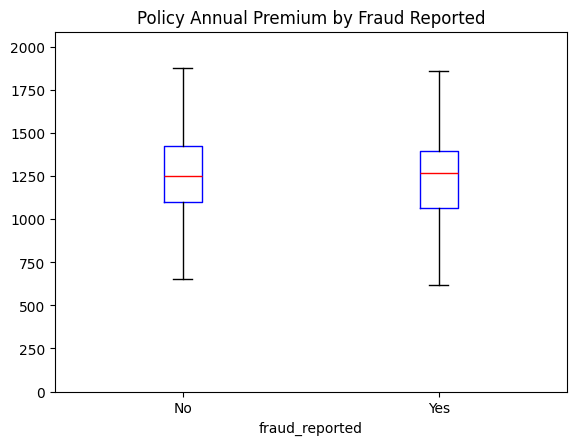

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
ax = df.boxplot(column='policy_annual_premium', by='fraud_reported', grid=False, showfliers=False,
                color=dict(boxes='blue', whiskers='black', medians='red', caps='black'))
plt.title('Policy Annual Premium by Fraud Reported')
plt.suptitle('')
#plt.xlabel('Fraud Reported')
#plt.ylabel('Policy Annual Premium')

# allow full range (a small buffer so top whisker is visible)
plt.ylim(0, df['policy_annual_premium'].max() * 1.02)
plt.show()

"""
# Policy Annual Premium — Fraud vs. Non-Fraud Analysis

## Counts
- **Non-Fraud (N):** 753 cases  
- **Fraud (Y):** 247 cases  
- Fraud rate ≈ **25%** of total cases.

---

## Central Tendency
- **Mean (N):** 1258.4  
- **Mean (Y):** 1250.2  
- **Median (N):** 1253.1  
- **Median (Y):** 1269.6  

➡️ Means and medians are nearly identical. No large shift in central tendency.

---

## Spread / Outliers
- Standard deviation (fraud) is slightly higher.  
- Fraud cases have a slightly lower 75th percentile and max value compared to non-fraud.  
- Interquartile ranges are similar.

---

## Practical Takeaway
Policy annual premium **alone** shows little raw separation between fraud and non-fraud cases.  
It is **unlikely to be a strong standalone predictor**, though it may contribute value when combined with other features.
"""


In [5]:
#Oky, now lets do the same thing, but this time we will take a look at fraud reported by policy deductible

df.groupby('fraud_reported')['policy_deductable'].describe()

,count,mean,std,min,25%,50%,75%,max
fraud_reported,,,,,,,,
No,753.0,1130.810093,606.771634,500.0,500.0,1000.0,2000.0,2000.0
Yes,247.0,1151.821862,628.123674,500.0,500.0,1000.0,2000.0,2000.0


<Figure size 1200x600 with 0 Axes>

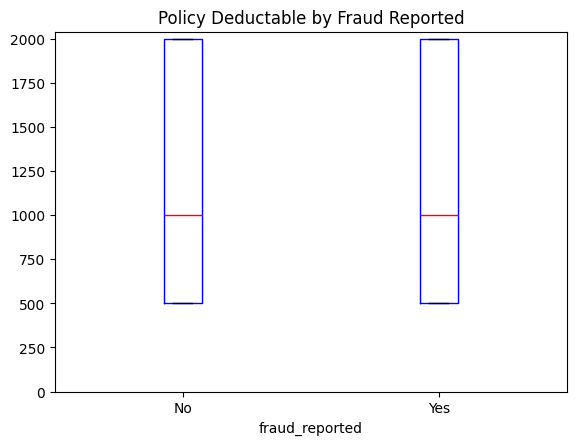

In [6]:
#Now lets visualize policy deductible by fraud reported
plt.figure(figsize=(12,6))
ax = df.boxplot(column='policy_deductable', by='fraud_reported', grid=False, showfliers=False,
                color=dict(boxes='blue', whiskers='black', medians='red', caps='black'))
plt.title('Policy Deductable by Fraud Reported')
plt.suptitle('')
#plt.xlabel('Fraud Reported')
#plt.ylabel('Policy Deductable')
plt.ylim(0, df['policy_deductable'].max() * 1.02)
plt.show()

"""
# Policy Deductible — Fraud vs. Non-Fraud Analysis

## Counts
- **Non-Fraud (N):** 753 cases  
- **Fraud (Y):** 247 cases  

---

## Central Tendency
- **Mean (N):** 1130.8  
- **Mean (Y):** 1151.8  
- **Median (N):** 1000  
- **Median (Y):** 1000  

➡️ Means and medians are nearly identical.

---

## Spread / Outliers
- **Std (N):** 606.8  
- **Std (Y):** 628.1  
- **Min/Max:** 500 to 2000 for both groups  
- **IQR:** Very similar (25% = 500, 75% = 2000)

---

## Practical Takeaway
Policy deductibles are **highly standardized** in this dataset (most values are fixed at 500, 1000, or 2000).  

As a result, policy_deductible shows **little separation** between fraud and non-fraud cases.  
It is unlikely to be a strong standalone predictor, though it may still contribute in combination with other variables.
"""


In [7]:
#Now lets take a look at capital 
#  by fraud reported
df.groupby('fraud_reported')['capital_gains'].describe()

,count,mean,std,min,25%,50%,75%,max
fraud_reported,,,,,,,,
No,753.0,25432.005312,27918.464555,0.0,0.0,0.0,51400.0,100500.0
Yes,247.0,24193.522267,27766.252081,0.0,0.0,0.0,48850.0,91900.0


<Figure size 1200x600 with 0 Axes>

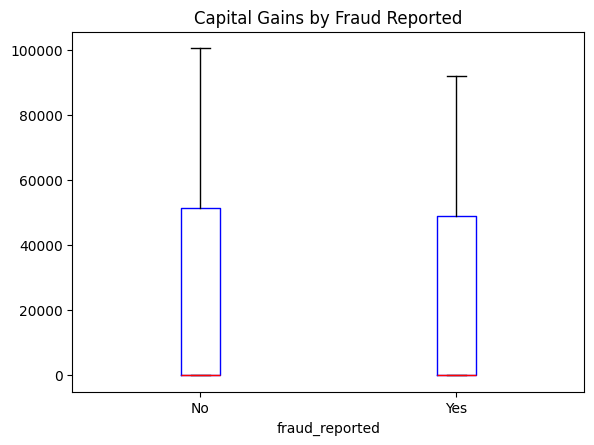

In [8]:
#Now lets visualize this data
plt.figure(figsize=(12,6))
ax = df.boxplot (column='capital_gains', by = 'fraud_reported', grid=False, showfliers=False,
                 color = dict(boxes='blue', whiskers= 'black', medians='red', caps='black'))
plt.title('Capital Gains by Fraud Reported')
plt.suptitle('')
plt.show()

## Capital Gains by Fraud Reported

We compared the distribution of capital gains for reported fraud (`Y`) vs. not reported (`N`).

### Boxplot Visualization
- The boxplot shows that both groups have highly skewed distributions with long whiskers.
- Most observations fall near **0**, while a smaller portion show very high capital gains values (up to ~100,000).
- Median values for both groups are **0**, indicating that capital gains are often absent.

### Descriptive Statistics
| Fraud Reported | Count | Mean     | Std Dev  | Min | 25% | 50% | 75%   | Max    |
|----------------|-------|----------|----------|-----|-----|-----|-------|--------|
| N (No)         | 753   | 25,432.0 | 27,918.5 | 0   | 0   | 0   | 51,400 | 100,500 |
| Y (Yes)        | 247   | 24,193.5 | 27,766.3 | 0   | 0   | 0   | 48,850 | 91,900  |

### Key Insights
- **Central tendency:** Both groups have a median of **0**, meaning most customers had no capital gains.
- **Spread:** Both show very wide distributions (standard deviation ~27K), suggesting outliers drive the averages.
- **Means:** Very close between fraud and non-fraud groups (~25K vs. ~24K).
- **Upper quartiles:** Slightly higher for non-fraud (`75% = 51,400`) vs. fraud (`75% = 48,850`).

📌 **Interpretation:**  
Capital gains do not appear to differ substantially between fraud-reported and non-fraud cases. The similarity across distributions suggests that **capital gains may not be a strong predictor of fraud** in this dataset.


In [9]:
#Lets take a look how gender affects fraud reported
df.groupby('insured_sex')['fraud_reported'].value_counts(normalize=True)


insured_sex  fraud_reported
FEMALE       No                0.765363
             Yes               0.234637
MALE         No                0.738661
             Yes               0.261339
Name: proportion, dtype: float64

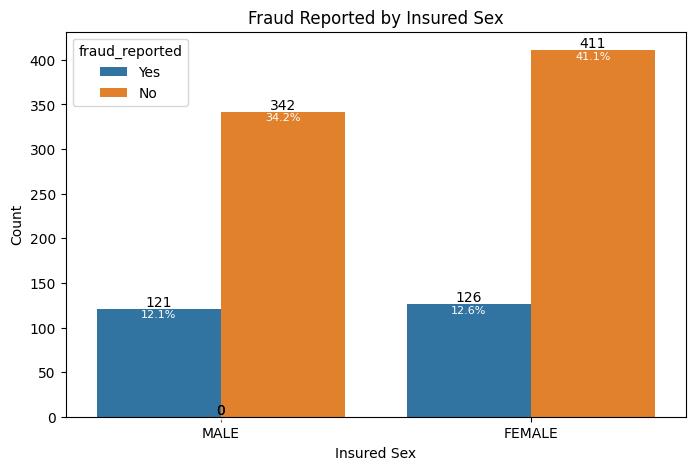

In [10]:
# Visualize insured_sex by fraud_reported using a countplot
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='insured_sex', hue='fraud_reported')
#lets put counts on top of bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2., height + 3, int(height), ha="center")
    #within bar, put percentage
    percentage = height / len(df) * 100
    plt.gca().text(p.get_x() + p.get_width()/2., height - 10, f'{percentage:.1f}%', ha="center", color='white', fontsize=8)
plt.title('Fraud Reported by Insured Sex')
plt.xlabel('Insured Sex')
plt.ylabel('Count')
plt.show()

Gender analysis shows a slightly higher fraud rate for males (26.1%) 
than females (23.5%), but the difference is modest. 
This suggests gender alone is not a strong predictor, 
but could be useful in combination with other features.
